## Import libraries, util functions and test image loading



In [2]:
# !pip install imutils
import cv2
import urllib3
import numpy as np

from PIL import Image

import imutils
from matplotlib import pyplot as plt
from typing import Union, Any, Iterable, Callable

# Block 2. Non-Linear Filtering and Morphological operations.

While linear filters can be effective for certain tasks, they often come with limitations when dealing with specific types of noise or when aiming to achieve certain effects on the image.

### Objectives:

1. **Median Filter Implementation**:
 Implement the median filter and understand its significance in noise removal.

2. **Defect detection with morphological operations**:
 Implement the basic morphological operations of dilation and erosion. Then implement the derived operations from these basics. After all this, propose pipelines to detect precisely the defects on some images.

3. **Watermarking**:
 Propose a pipeline for image watermarking using any of the previous techniques (Linear filtering, Non-linear filtering, Fourier transform, Morphological operations).

4. **Watermark extraction challenge (extra points)**
 Given three images with embedded watermarks of varying complexity levels, employ a combination of techniques seen in the course (image enhancing, linear filtering, non-linear filtering, morphological operations, and Fourier analysis) to extract the watermarks.
 You should obtain the binary mask with legible watermark for each image.

 ***Note***: The Challenge Exercise can augment your total grade **for up to 2 points**. For example, if you score 6 on this lab and complete the challenge, your score will be boosted up to 2 points, depending on the solution (0.5 easy; 0.5 medium; 1 hard). The total lab grade remains capped at 10 points.

---

### Mandatory Questions:

- How does the median filter differ in functionality from the mean filter, and under what circumstances is it preferable to use it?
- Describe how a median filter works in the spatial domain.
- How does the window size of the median filter affect the output image?
- Can a median filter be implemented as a convolution operation? Explain why or why not.
- What are the basic morphological operations? Describe dilation and erosion in terms of structuring elements.
- How do morphological operations change the shape and size of objects in an image?
- What are some common derived morphological operations and where they are used for?
- What is the purpose of watermarking in image processing?
- What is the difference between visible and invisible watermarks?
- How could you utilize Fourier Transform for watermark embedding?


### Optional Deep Dive Questions:

- Beyond noise removal, can you think of any other applications where the median filter might be advantageous?
- Compare the computational complexity of median filtering with Gaussian filtering.
- Describe the process of top-hat and bottom-hat filtering. How can they be used for defect detection?
- Can morphological operations be applied to multi-channel images? Discuss the challenges.
- Discuss the concept of "hit-or-miss" transform in morphological operations. How can it be useful in defect detection?
- Explore the concept of morphological gradients. How can they be derived from the basic operations of erosion and dilation?
- In watermark extraction, are there any other techniques or methods (beyond the scope of this course) that might aid in making the extraction process more efficient or accurate? Research and discuss.
- Explore more robust watermarking and the techniques.

## Median filter

#### Objective:
Implement the median filter operation by hand and compare with linear blur filters.

---

#### Guideline:
1. Implement a function to perform the median filters over an image. Make sure to handle edge cases and allow for different kernel sizes. DO NOT USE LIBRARY IMPLEMENTATIONS.
2. Experiment with different kernel sizes and apply on various images.
3. Add different quantities of noise and analyze when an image is not recoverable.
4. Compare your hand-implemented method with libraries implementation.
5. Finally compare the median filter to the linear filter counterparts (gaussian / box filters) in order to explain how they differ.
---

#### Expected results:
- Your hand-implemented median filter.
- Qualitative comparison on different blurs

In [2]:
def make_3d(a: np.ndarray) -> np.ndarray:
	return np.repeat(a[:,:,np.newaxis], 3, axis=2)

def median_blur(image: Union[np.ndarray, Any], kernel_size: Union[int, Iterable]) -> np.ndarray:
	# manage arguments
	if not isinstance(image, np.ndarray):
		try:
			image = np.array(image)
		except:
			raise TypeError('Invalid image type')
	
	if isinstance(kernel_size, int):
		kernel_size = (kernel_size, kernel_size)
	if np.ndim(image) == 2:
		image = np.expand_dims(image, axis=2)

	# TODO: padding
	h, w, channels = image.shape
	k_h, k_w = kernel_size
	new_h = (h - k_h) + 1
	new_w = (w - k_w) + 1
	result = np.zeros((new_h, new_w, channels))

	# window sliding
	for i in range(0, new_h):
		for j in range(0, new_w):
			temp = image[i:i+k_h, j:j+k_w, :]
			result[i,j,:] = np.median(temp, axis=(0,1))
	
	if channels == 1: # leave it 2d again
		return result[:,:,0].astype(np.int16)
	return result.astype(np.int16)

Original images shape:  (398, 398) (512, 512, 3)


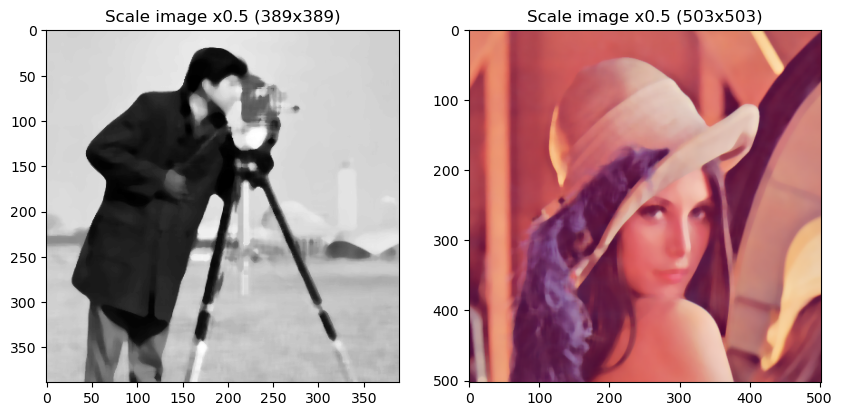

In [3]:
# Load images and test your functions
image1 = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.cvtColor(cv2.imread('images/lenna.png'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
print('Original images shape: ', image1.shape, image2.shape)
img1 = median_blur(image1, 10)
plt.title(f'Scale image x0.5 ({img1.shape[0]}x{img1.shape[1]})')
plt.imshow(img1, cmap='gray')
plt.subplot(1, 2, 2)
img2 = median_blur(image2, 10)
plt.title(f'Scale image x0.5 ({img2.shape[0]}x{img2.shape[1]})')
plt.imshow(img2)
plt.show()

## Morphological operators



#### Objective:
Implement the basic morphological operators seen in class and prove their properties.

Basic morphological operators:
 - Dilation
 - Erosion

Derived operations:   
 - Open
 - Close
 - Morphological gradient
 - Top hat (optional)
 - Bottom hat (optional)
 - Skeleton (optional)
 - Convex hull or perimeter (optional)

##### Prove each of the properties

- Translation Invariance (dilation and erosion)
- Anti-Extensive (Erosion)
- Extensive (Dilation)
- Idempotence (Open and Close)
- Monotonically increasing (dilation and erosion)

---

#### Guideline:
1. Implement a function to perform the erosion and dilation operations. DO NOT USE LIBRARY IMPLEMENTATIONS.
2. Implement the derived operations using the previous ones.
3. Apply different operators to dummy images and prove each of the properties of morphological operators.
4. Prove each one of the listed properties.

---

#### Expected results:
- Your hand-implemented functions for dilation, erosion, opening, closing & morphological gradient .
- Prove of each one of the properties (list them all). Prove it mathematically in the report or by examples (plot figures)
- Example of each operation on dummy images (design your owns using openCV)

shape: (64, 64)


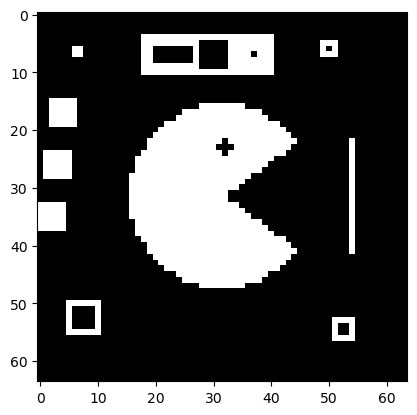

In [11]:
PACMAN_255 = np.array(cv2.imread('images/pacman_binary.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
PACMAN_1 = PACMAN_255 // 255
print('shape:', PACMAN_1.shape)

plt.imshow(PACMAN_1, cmap='gray')
plt.show()

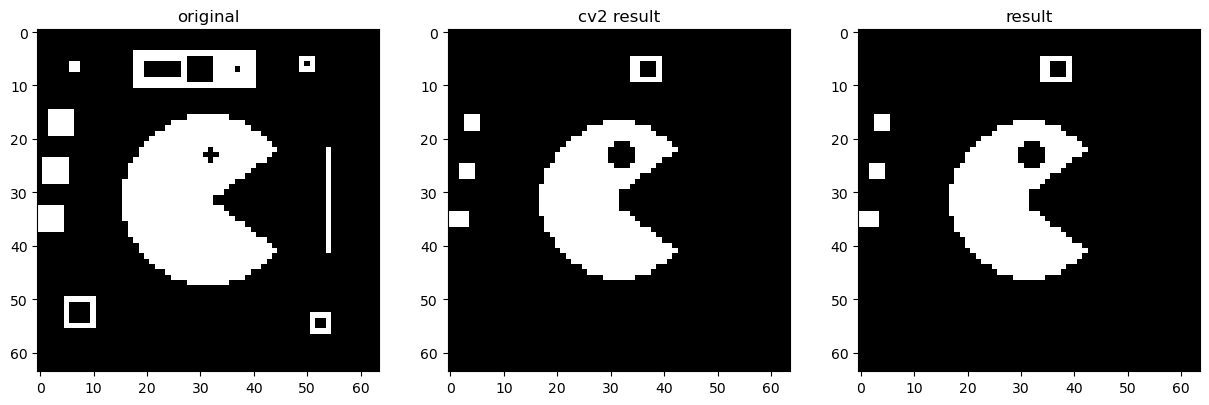

In [12]:
def sliding_window(image: Union[np.ndarray, Any], structuring_element: np.ndarray, func: Callable, pad_mode: str = 'constant') -> np.ndarray:
	# manage arguments
	if not isinstance(image, np.ndarray):
		try:
			image = np.array(image)
		except:
			raise TypeError('Invalid image type')
	
	if np.ndim(image) == 2:
		image = np.expand_dims(image, axis=2)
	if np.ndim(structuring_element) == 2:
		structuring_element = np.expand_dims(structuring_element, axis=2)
	
	h, w, channels = image.shape
	k_h, k_w = structuring_element.shape[:2]

	padding = ((k_h-1)//2, (k_w-1)//2)
	p_y, p_x = padding
	image_padded = np.pad(image, ((p_y, p_y), (p_x, p_x), (0, 0)), mode=pad_mode)
	result = np.zeros_like(image)

	# window sliding
	for i in range(0, h):
		for j in range(0, w):
			temp = image_padded[i:i+k_h, j:j+k_w, :]
			result[i,j,:] = func(temp, structuring_element)
	
	if channels == 1: # leave it 2d again
		return result[:,:,0].astype(np.int16)
	return result.astype(np.int16)

def dilation(image, structuring_element):
	f = lambda region, str_e: np.max(np.where(str_e != 0, region, 0), axis=(0,1))
	return sliding_window(image, structuring_element, f, pad_mode='minimum') # TODO: explain why 0-padding no

def erosion(image, structuring_element):
	f = lambda region, str_e: np.min(np.where(str_e != 0, region, np.inf), axis=(0,1))
	return sliding_window(image, structuring_element, f, pad_mode='maximum')

structuring_element = np.zeros((5, 5), np.uint8)
structuring_element[1:-1, 1:-1] = 1

image = PACMAN_1
img = erosion(image, structuring_element)
cv = cv2.erode(image, structuring_element, iterations=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('original')
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 3, 2)
plt.title('cv2 result')
plt.imshow(cv, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 3, 3)
plt.title('result')
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

In [16]:
def opening(image, structuring_element):
	er = erosion(image, structuring_element)
	opened_image = dilation(er, structuring_element)
	return opened_image

def closing(image, structuring_element):
	dil = dilation(image, structuring_element)
	closed_image = erosion(dil, structuring_element)
	return closed_image

def top_hat(image, structuring_element):
	original_img = image.copy()
	opened_img = opening(original_img, structuring_element)
	top_hat_img = original_img - opened_img
	return top_hat_img

def bottom_hat(image, structuring_element):
	original_img = image.copy()
	closed_img = closing(original_img, structuring_element)
	bottom_hat_img = closed_img - original_img
	return bottom_hat_img

def morphological_gradient(image, structuring_element):
    result = (dilation(image, structuring_element)) - (erosion(image, structuring_element))
    return result

def convex_hull(image):
    # Binarize image
    threshold = 128 # The half portion of the values in the image
    binary_image = np.where(image > threshold, 255, 0).astype(np.uint8)

    # Compute edges
    structuring_element = np.ones((3, 3), np.uint8)
    dil = dilation(image, structuring_element)

    edges = dil - binary_image

    # Initialize Hull points as an empty list
    hull_points = []

    # Determine starting point (leftmost point)
    points = np.column_stack(np.where(edges > 0))
    start_point = min(points, key=lambda x: x[0]) # the leftmost point

    current_point = start_point
    endpoint = None

    while np.equal(endpoint, start_point).all() == False:
        hull_points.append(current_point)
        endpoint = points[0]

        for point in points:
            # convert to list to be able to compare
            point = list(point)
            current_point = list(current_point)
            endpoint = list(endpoint)
            if point != current_point:
                # cross product calculation to determine orientation
                orientation = (endpoint[0] - current_point[0]) * (point[1] - current_point[1]) - (point[0] - current_point[0]) * (endpoint[1] - current_point[1])
                if endpoint == current_point or orientation > 0:
                    endpoint = point
        # set the current point to the endpoint for the next iteration
        current_point = endpoint

        return hull_points

def skeletonize(image):
	# Set structuring element to 4-connected
	struct_element = np.array([[0, 1, 0],
							   [1, 1, 1],
							   [0, 1, 0]], dtype=np.uint8)
	# Define ‘skeleton’ as empty image
	skeleton = np.zeros(image.shape, dtype=np.uint8)

	# Previous image placeholder for convergence check
	previous_image = np.zeros(image.shape, dtype=np.uint8)
	converged = False

	# While not converged (image has no more changes):
	while not converged:
		# Erode the image by ‘struct_element’
		eroded = cv2.erode(image, struct_element)
		# Dilate the eroded image (Opening)
		opened = cv2.dilate(eroded, struct_element)
		# Subtract the opened image from the original to get the top-hat transform
		top_hat = image - opened
		# Add new elements (bitwise_OR) to the skeleton
		skeleton = cv2.bitwise_or(skeleton, top_hat)
		# Update the image with the eroded one
		image = eroded.copy()
		# Check if the image is fully eroded
		converged = np.array_equal(eroded, previous_image)
		# Update previous image
		previous_image = eroded.copy()

	return skeleton

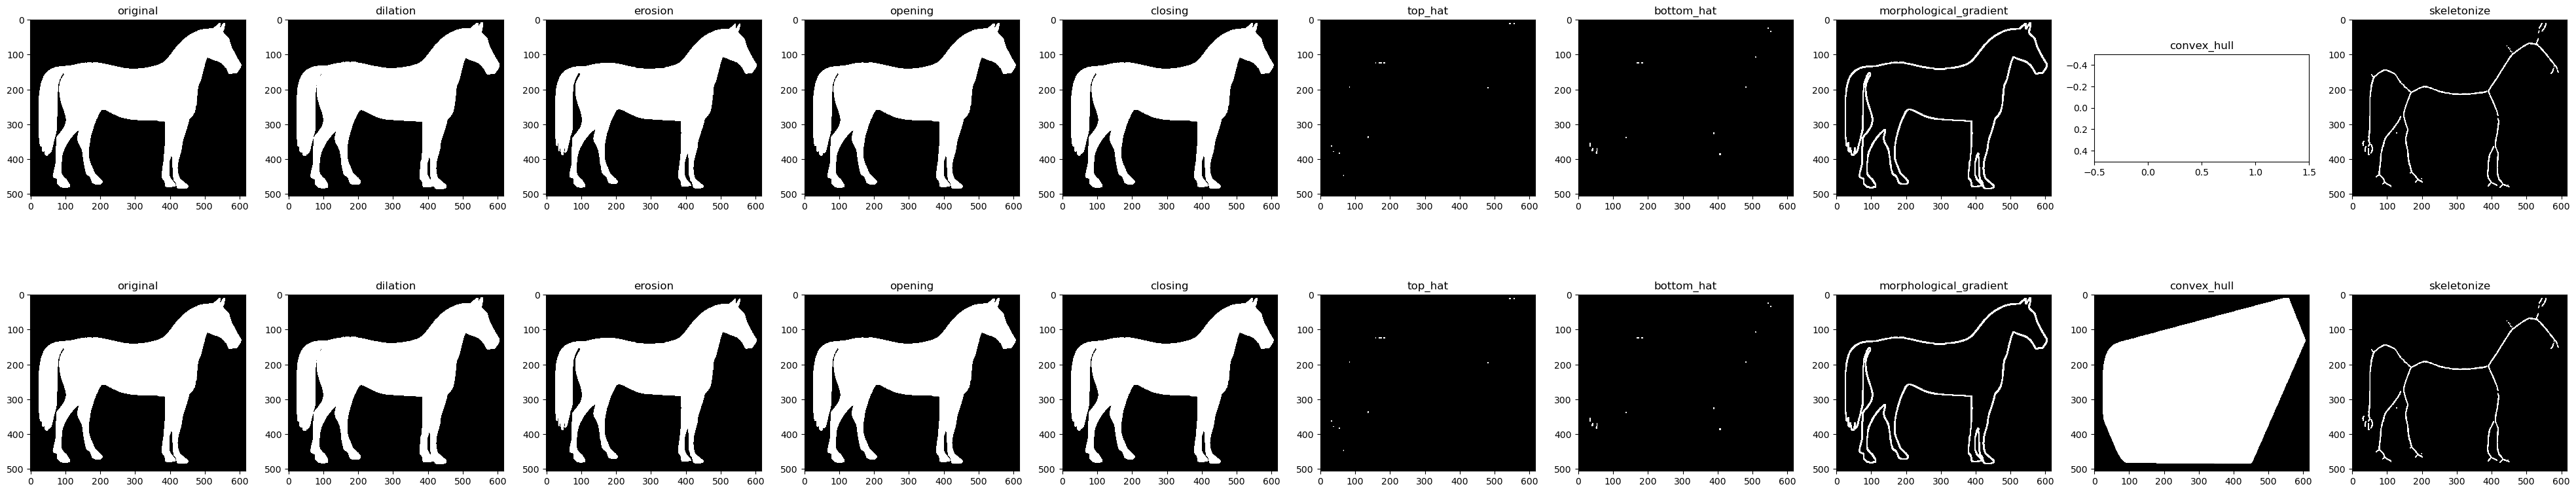

In [108]:
image = cv2.imread('images/horse_binary.png', cv2.IMREAD_GRAYSCALE)
image.dtype = np.uint8
# image = PACMAN_1
structuring_element = np.zeros((5, 5), np.uint8)
structuring_element[1:-1, 1:-1] = 1

def original(image, structuring_element):
	return image

cv2_opening = lambda image, structuring_element: cv2.morphologyEx(image, cv2.MORPH_OPEN, structuring_element)
cv2_closing = lambda image, structuring_element: cv2.morphologyEx(image, cv2.MORPH_CLOSE, structuring_element)
cv2_top_hat = lambda image, structuring_element: cv2.morphologyEx(image, cv2.MORPH_TOPHAT, structuring_element)
cv2_bottom_hat = lambda image, structuring_element: cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, structuring_element)
cv2_morphological_gradient = lambda image, structuring_element: cv2.morphologyEx(image, cv2.MORPH_GRADIENT, structuring_element)
def cv2_convex_hull(image):
	_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
	contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
	hull_image = np.zeros_like(image)
	if len(contours) == 0:
		return hull_image
	largest_contour = max(contours, key=cv2.contourArea)
	hull = cv2.convexHull(largest_contour)
	cv2.drawContours(hull_image, [hull], 0, 255, -1)
	return hull_image

def cv2_skeletonize(image):
	size = np.size(image)
	skel = np.zeros(image.shape, np.uint8)
	_, image = cv2.threshold(image, 127, 255, 0)
	element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
	done = False
	while not done:
		eroded = cv2.erode(image, element)
		temp = cv2.dilate(eroded, element)
		temp = cv2.subtract(image, temp)
		skel = cv2.bitwise_or(skel, temp)
		image = eroded.copy()
		zeros = size - cv2.countNonZero(image)
		if zeros == size:
			done = True
	return skel

func_names = ['original', 'dilation', 'erosion', 'opening', 'closing', 'top_hat', 'bottom_hat', 'morphological_gradient', 'convex_hull', 'skeletonize']
our_functions = [original, dilation, erosion, opening, closing, top_hat, bottom_hat, morphological_gradient, convex_hull, skeletonize]
cv2_functions = [original, cv2.dilate, cv2.erode, cv2_opening, cv2_closing, cv2_top_hat, cv2_bottom_hat, cv2_morphological_gradient, cv2_convex_hull, cv2_skeletonize]

fig, ax = plt.subplots(2, len(our_functions), figsize=(5*len(our_functions), 10))

for i, (func, name) in enumerate(zip(our_functions, func_names)):
	if name not in ('convex_hull', 'skeletonize'):
		result = func(image, structuring_element)
	else:
		result = func(image)
	ax[0, i].imshow(result, cmap='gray', vmin=0, vmax=1)
	ax[0, i].set_title(name)
for i, (func, name) in enumerate(zip(cv2_functions, func_names)):
	if name not in ('convex_hull', 'skeletonize'):
		result = func(image, structuring_element)
	else:
		result = func(image)
	ax[1, i].imshow(result, cmap='gray', vmin=0, vmax=1)
	ax[1, i].set_title(name)

plt.show()

### Proving properties
- Translation Invariance (dilation and erosion)
- Anti-Extensive (Erosion)
- Extensive (Dilation)
- Idempotence (Open and Close)
- Monotonically increasing (dilation and erosion)

*Note: these properties are explained in the report, the following are just images for visualization*

In [42]:
image1 = np.array([
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 1, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

image2 = np.array([
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 1, 1, 1, 1, 1, 0, 0],
	[0, 0, 1, 1, 1, 1, 1, 0, 0],
	[0, 0, 1, 1, 1, 1, 1, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

image3 = np.array([
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 1, 1, 1, 1, 1, 1, 1, 0],
	[0, 1, 1, 1, 0, 1, 1, 1, 0],
	[0, 1, 1, 1, 0, 1, 1, 1, 0],
	[0, 1, 1, 1, 0, 1, 1, 1, 0],
	[0, 1, 1, 1, 1, 1, 1, 1, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

structuring_element = np.zeros((5, 5), np.uint8)
structuring_element[1:-1, 1:-1] = 1

#### Translation Invariance
Dilation

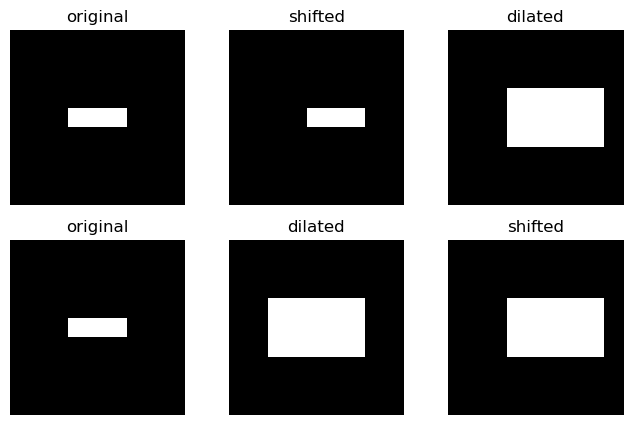

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
process_1 = [image1, np.roll(image1, 1, axis=1), dilation(np.roll(image1, 1, axis=1), structuring_element)]
process_2 = [image1, dilation(image1, structuring_element), np.roll(dilation(image1, structuring_element), 1, axis=1)]

for i, (img, title) in enumerate(zip(process_1, ['original', 'shifted', 'dilated'])):
	ax[0, i].imshow(img, cmap='gray', vmin=0, vmax=1)
	ax[0, i].set_title(title)
	ax[0, i].axis('off')
for i, (img, title) in enumerate(zip(process_2, ['original', 'dilated', 'shifted'])):
	ax[1, i].imshow(img, cmap='gray', vmin=0, vmax=1)
	ax[1, i].set_title(title)
	ax[1, i].axis('off')
plt.show()

Erosion

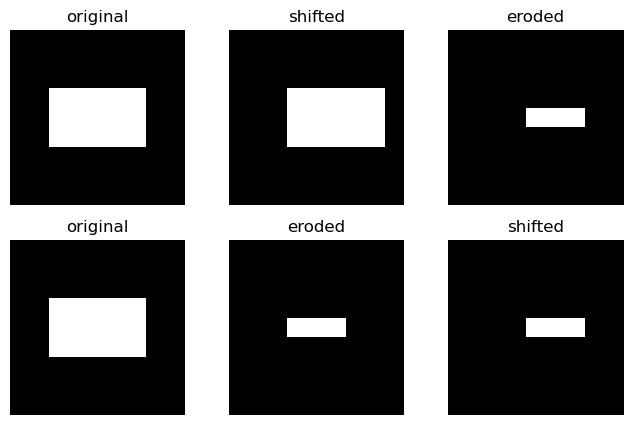

In [32]:
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
process_1 = [image2, np.roll(image2, 1, axis=1), erosion(np.roll(image2, 1, axis=1), structuring_element)]
process_2 = [image2, erosion(image2, structuring_element), np.roll(erosion(image2, structuring_element), 1, axis=1)]

for i, (img, title) in enumerate(zip(process_1, ['original', 'shifted', 'eroded'])):
	ax[0, i].imshow(img, cmap='gray', vmin=0, vmax=1)
	ax[0, i].set_title(title)
	ax[0, i].axis('off')
for i, (img, title) in enumerate(zip(process_2, ['original', 'eroded', 'shifted'])):
	ax[1, i].imshow(img, cmap='gray', vmin=0, vmax=1)
	ax[1, i].set_title(title)
	ax[1, i].axis('off')
plt.show()

#### Idempotence
Opening

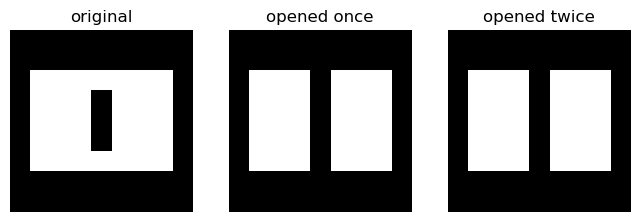

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5))
process = [image3, opening(image3, structuring_element), opening(opening(image3, structuring_element), structuring_element)]

for i, (img, title) in enumerate(zip(process, ['original', 'opened once', 'opened twice'])):
	ax[i].imshow(img, cmap='gray', vmin=0, vmax=1)
	ax[i].set_title(title)
	ax[i].axis('off')
plt.show()

Closing

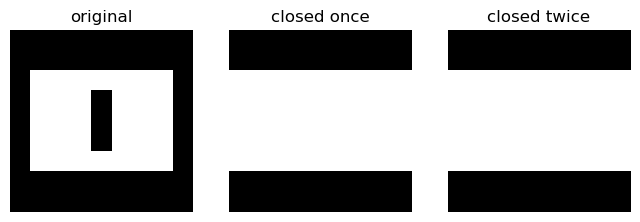

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5))
process = [image3, closing(image3, structuring_element), closing(closing(image3, structuring_element), structuring_element)]

for i, (img, title) in enumerate(zip(process, ['original', 'closed once', 'closed twice'])):
	ax[i].imshow(img, cmap='gray', vmin=0, vmax=1)
	ax[i].set_title(title)
	ax[i].axis('off')
plt.show()

## Defect detection with Morphological operations


Objective:

Implement a pipeline for defect detection in a folder containing images. The pipelines should aim to obtain segmentation masks specifically on the defects using various image processing techniques seen in this course, focusing morphological operations.

---

Guideline:
- Inspect the images in the folder ```defects``` and identify the nature of defects.
- Design separate pipelines for different types of defects.
- For each pipeline, apply morphological operations and other techniques discussed in the course to isolate the defect and generate a segmentation mask.
- Evaluate the quality of the segmentation masks against ground truth using Intersection over Union (IoU) as a metric.

---

Expected results:
- Individual pipelines designed for each type of defect.
- Qualitative analysis showcasing the effectiveness of your pipeline in isolating defects.
- Quantitative analysis providing IoU scores for each pipeline when compared to ground truth masks in the same folder.

The score for pipeline 1 in mask 000 is:  0.7824580891272892


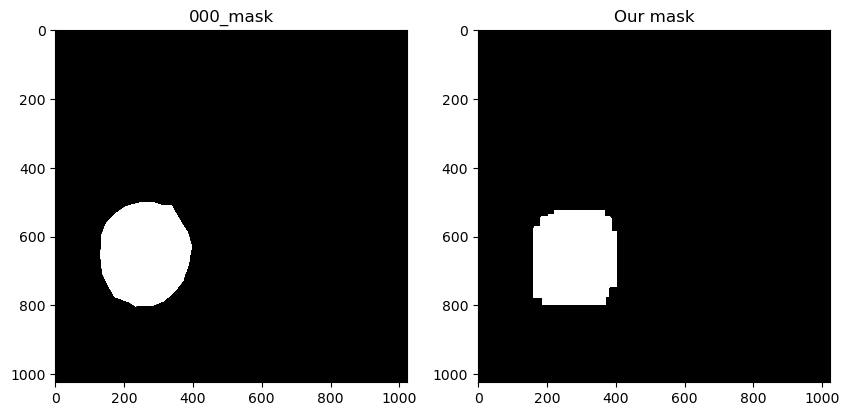

In [12]:
def pipeline_1(image):
	# apply thresholding to isolate the defect
	threshold = 128
	binary_image = np.where(image > threshold, 255, 0).astype(np.uint8)

	# apply morphological operation to detect the defect
	structuring_element = np.zeros((10, 10), np.uint8)
	structuring_element[1:-1, 1:-1] = 1
	opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

	mask = binary_image - opened_image
	dil_mask = cv2.dilate(mask, structuring_element, iterations=20)
	ero_mask = cv2.erode(dil_mask, structuring_element, iterations=20)
	return 255 - ero_mask

def pipeline_2(image):
	# define the structuring element for the thresholding
	structuring_element = np.ones((3, 3), np.uint8)

	# Perform edge detection
	edges = cv2.Canny(image, 100, 200)

	# Threshold the image
	ret, thresholded_img = cv2.threshold(edges, 200, 255, cv2.THRESH_BINARY)
	
	# Perform morphological operations
	eroded = cv2.dilate(thresholded_img, structuring_element, iterations=4)
	closing_img = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, structuring_element)
	
	# evenly erode and dilate the image (opening)
	eroded_img = cv2.erode(closing_img, structuring_element, iterations=2)
	dilation_img = cv2.dilate(eroded_img, structuring_element, iterations=1)
	erode_again = cv2.erode(dilation_img, structuring_element, iterations=1)
	dilate_again = cv2.dilate(erode_again, structuring_element, iterations=2)

	# Use different structuring element to remove circular structures
	circular_struct_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))

	
	erosion_updated = cv2.erode(dilate_again, circular_struct_element, iterations=2)
	dilation_updated = cv2.dilate(erosion_updated, circular_struct_element, iterations=2)
	erode_final = cv2.erode(dilation_updated, circular_struct_element, iterations=1)
	closing_now = cv2.morphologyEx(erode_final, cv2.MORPH_CLOSE, structuring_element)
	return closing_now

def pipeline_3(image):
	# define the structuring element for the thresholding
	structuring_element = np.ones((3, 3), np.uint8)

	# Perform edge detection
	edges = cv2.Canny(image, 100, 200)

	# Threshold the image
	ret, thresholded_img = cv2.threshold(edges, 200, 255, cv2.THRESH_BINARY)
	
	# Perform morphological operations
	eroded = cv2.dilate(thresholded_img, structuring_element, iterations=4)
	closing_img = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, structuring_element)
	
	# evenly erode and dilate the image (opening)
	eroded_img = cv2.erode(closing_img, structuring_element, iterations=2)
	dilation_img = cv2.dilate(eroded_img, structuring_element, iterations=1)
	erode_again = cv2.erode(dilation_img, structuring_element, iterations=1)
	dilate_again = cv2.dilate(erode_again, structuring_element, iterations=2)

	# Use different structuring element to remove circular structures
	circular_struct_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))

	
	erosion_updated = cv2.erode(dilate_again, circular_struct_element, iterations=2)
	dilation_updated = cv2.dilate(erosion_updated, circular_struct_element, iterations=2)
	erode_final = cv2.erode(dilation_updated, circular_struct_element, iterations=1)
	closing_now = cv2.morphologyEx(erode_final, cv2.MORPH_CLOSE, structuring_element)
	return closing_now

def pipeline_4(image):
	# define the structuring element, in this case a circular one
	circular_struct_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))

	# Perform edge detection
	edges = cv2.Canny(image, 100, 200)

	# Threshold the image
	ret, thresholded_img = cv2.threshold(edges, 200, 255, cv2.THRESH_BINARY)

	# Apply dilation
	dilation = cv2.dilate(thresholded_img, circular_struct_elem, iterations=12)

	# Detect the defect
	defect = cv2.absdiff(dilation, thresholded_img)
	closed_defect = cv2.morphologyEx(defect, cv2.MORPH_CLOSE, circular_struct_elem)
	
	# Use different structuring element to remove little cracks
	structuring_element = np.ones((8, 8), np.uint8)
	close_again = cv2.morphologyEx(closed_defect, cv2.MORPH_CLOSE, structuring_element)
	erode = cv2.erode(close_again, structuring_element, iterations=2)
	return erode

def calculate_iou(mask1, mask2):
   intersection = np.logical_and(mask1, mask2)
   union = np.logical_or(mask1, mask2)
   iou_score = np.sum(intersection) / np.sum(union)
   return iou_score

mask_1 = np.array(cv2.imread('images/defect/000_mask.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
stain = np.array(cv2.imread('images/defect/000.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
pipeline_1_result = pipeline_1(stain)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('000_mask')
plt.imshow(mask_1, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.title('Our mask')
plt.imshow(pipeline_1_result, cmap='gray', vmin=0, vmax=1)
score_1 = calculate_iou(mask_1, pipeline_1_result)
print("The score for pipeline 1 in mask 000 is: ", score_1)
plt.show()

The score for pipeline 2 in mask 005 is:  0.5598491027732463


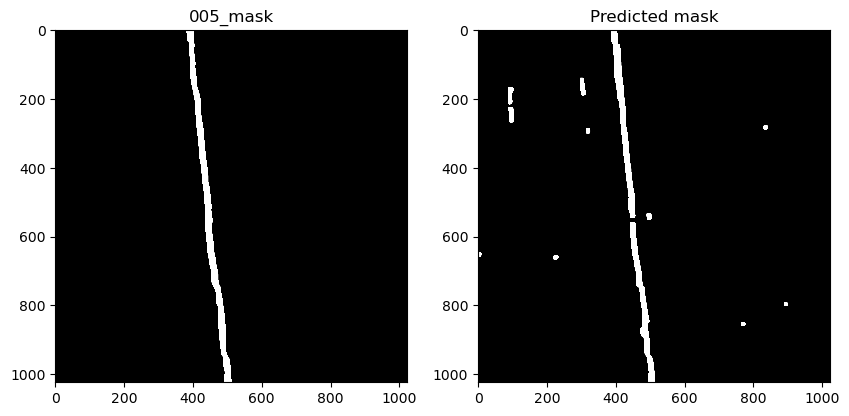

In [13]:
mask_2 = np.array(cv2.imread('images/defect/005_mask.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
woodcrack = np.array(cv2.imread('images/defect/005.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
pipeline_2_result = pipeline_2(woodcrack)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('005_mask')
plt.imshow(mask_2, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.title('Predicted mask')
plt.imshow(pipeline_2_result, cmap='gray', vmin=0, vmax=1)
score_2 = calculate_iou(mask_2, pipeline_2_result)
print("The score for pipeline 2 in mask 005 is: ", score_2)
plt.show()

The score for pipeline 3 in mask 013 is:  0.4615974244979304


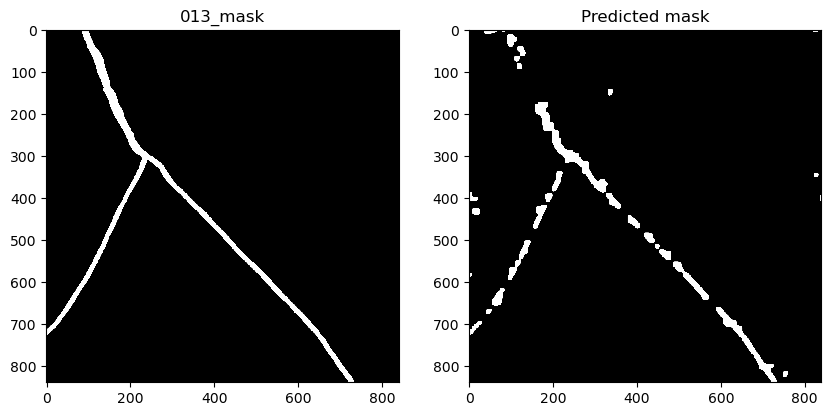

In [14]:
mask_3 = np.array(cv2.imread('images/defect/013_mask.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
ceramic_crack = np.array(cv2.imread('images/defect/013.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
pipeline_3_result = pipeline_3(ceramic_crack)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('013_mask')
plt.imshow(mask_3, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.title('Predicted mask')
plt.imshow(pipeline_3_result, cmap='gray', vmin=0, vmax=1)
score_3 = calculate_iou(mask_3, pipeline_3_result)
print("The score for pipeline 3 in mask 013 is: ", score_3)
plt.show()

The score for pipeline 4 in mask 014 is:  0.2121314808539478


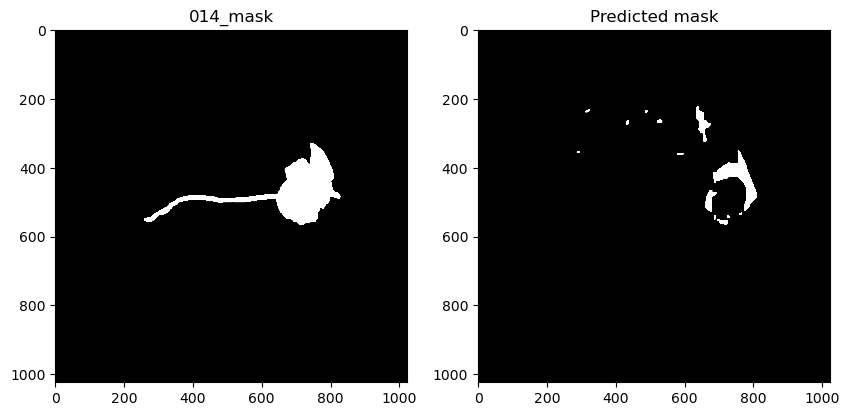

In [15]:
mask_4 = np.array(cv2.imread('images/defect/014_mask.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
chestnut = np.array(cv2.imread('images/defect/014.png', cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
pipeline_4_result = pipeline_4(chestnut)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('014_mask')
plt.imshow(mask_4, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.title('Predicted mask')
plt.imshow(pipeline_4_result, cmap='gray', vmin=0, vmax=1)
score_4 = calculate_iou(mask_4, pipeline_4_result)
print("The score for pipeline 4 in mask 014 is: ", score_4)
plt.show()

## Watermarking


#### Objective:
Use any of the previous techniques to apply a hard-to-removal watermark from to an image. After that you will try to reverse-engeneer your method and try to extract the text of the watermark you created.

---

#### Guideline:
1. Define a pipeline using the previous techniques (linear filtering, fourier transform, non-linear filtering, morphological operations, ...). You can use one or a combination of different techniques to produce a good pipeline.
2. Try to develop a method to extract the watermark (binary mask with the original watermark you introduced) by using the watermaked image and the original image.
3. Same as the previous one but relying only on the watermarked image. (You can't use the original image)
---

#### Expected results:
- A function that takes an image and a watermark (a binary image or a text) and returns the watermarked image.
- A pair of original image and the watermaked one
- A pair of a watermarked image and the watermark extracted (by using both original and watermaked image)
- A pair of a watermarked image and the watermark extracted (by using only the watermaked image)

---

The pipeline for applying a watermark we designed consists of combining the frequency domains of both the original and the watermark image, in a way that a high-pass filter is applied to the watermark, and a low-pass to the original. Then the results are summed. Moreover, dilation is applyed to the watermark, which is a binary mask.

---

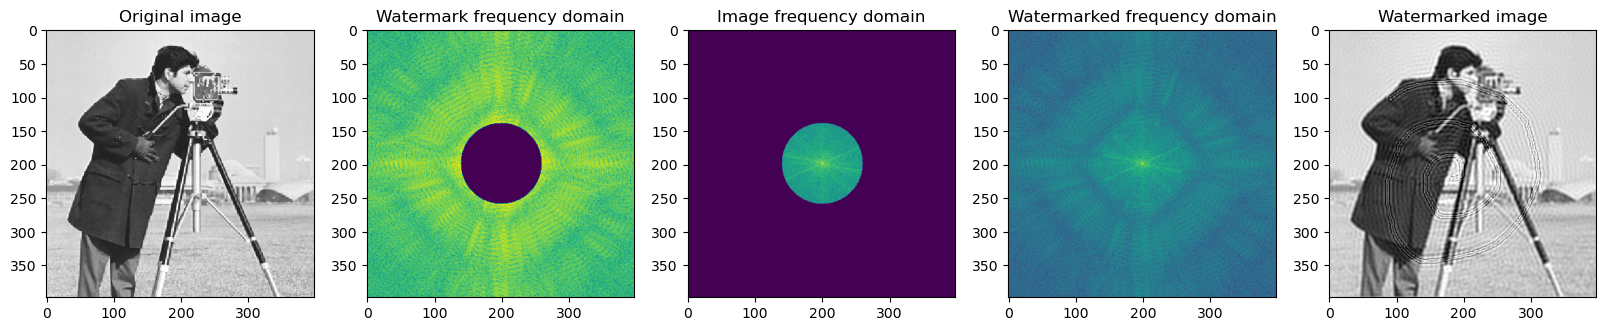

In [45]:
def apply_watermark(image: Union[np.ndarray, Any], watermark_image: Union[np.ndarray, Any], watermark_text: str = None) -> tuple[np.ndarray, tuple[np.ndarray, np.ndarray, np.ndarray]]:
	'''
	Applies a given watermark image or text to an image in the frequency domain. Returns the watermarked image (and some extras to plot)
	'''
	if watermark_text:
		# Draw given text to form a mask
		watermark_resized = np.zeros_like(image)
		(text_width, text_height), _ = cv2.getTextSize(watermark_text, cv2.FONT_HERSHEY_SIMPLEX, 2, 2)
		x = (watermark_resized.shape[1] - text_width) // 2
		cv2.putText(watermark_resized, watermark_text, (x, watermark_resized.shape[0]//2), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 2)
	else:
		# resize watermark image to fit image
		watermark_resized = cv2.resize(watermark_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

	# apply dilation
	structuring_element = np.ones((3, 3), np.uint8)
	watermark_resized = dilation(watermark_resized, structuring_element)

	# transform to frequency domain
	image_fft = np.fft.fft2(image)
	watermark_fft = np.fft.fft2(watermark_resized)
	image_fft_shift = np.fft.fftshift(image_fft)
	watermark_fft_shift = np.fft.fftshift(watermark_fft)

	# process of merging the image and watermark in the frequency domain
	mask = np.ones(image_fft_shift.shape)
	cv2.circle(mask, (image_fft_shift.shape[0]//2, image_fft_shift.shape[1]//2), 60, 0, -1)

	image_fft_shift = image_fft_shift * (1-mask)
	watermark_fft_shift = watermark_fft_shift * mask

	watermarked_fft_shift = image_fft_shift + watermark_fft_shift

	# transform back to spatial domain
	watermarked_fft = np.fft.ifftshift(watermarked_fft_shift)
	watermarked_image = np.fft.ifft2(watermarked_fft).real

	# for consistency, clip values to [0, 255]
	watermarked_image = np.clip(watermarked_image, 0, 255).astype(np.uint8)

	return watermarked_image, (image_fft_shift, watermark_fft_shift, watermarked_fft_shift)

image = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
watermark_image = cv2.imread('images/watermark_binary.png', cv2.IMREAD_GRAYSCALE)
watermarked, (image_fft_shift, watermark_fft_shift, watermarked_fft_shift) = apply_watermark(image, watermark_image)
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.subplot(1, 5, 2)
plt.imshow(np.log1p(np.abs(watermark_fft_shift))) # log1p (log(1+x)) to avoid log(0)
plt.title('Watermark frequency domain')
plt.subplot(1, 5, 3)
plt.imshow(np.log1p(np.abs(image_fft_shift)))
plt.title('Image frequency domain')
plt.subplot(1, 5, 4)
plt.imshow(np.log1p(np.abs(watermarked_fft_shift)))
plt.title('Watermarked frequency domain')
plt.subplot(1, 5, 5)
plt.imshow(watermarked, cmap='gray')
plt.title('Watermarked image')
plt.show()

---

To extract the watermark given the original image, we can build a high-pass filter where the values in which both images are equal are set to 0, and where they are different, to 1. As the watermark was embedded in the high frequencies, this mask will only take the high-frequencies of the watermarked image. The good part is that it works whatever radius we used for the high and low pass filters in apply_watermark(). Closing is the  applied to fill the holes that could arise from a non perfect extraction of the watermark.

---

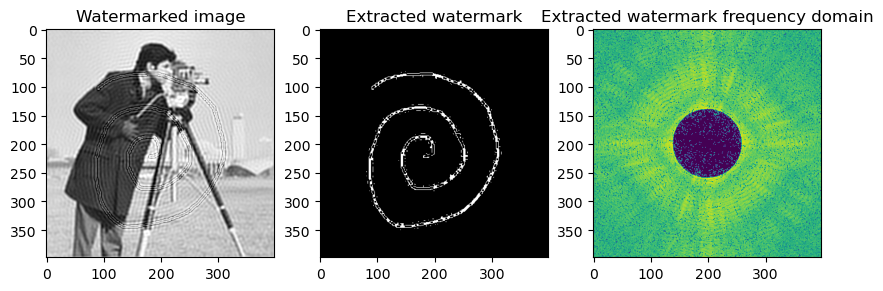

In [46]:
def remove_watermark_easy(original_image: Union[np.ndarray, Any], watermarked_image: Union[np.ndarray, Any]) -> tuple[np.ndarray, np.ndarray]:
	'''
	Returns the extracted watermark from the watermarked image (and some extras to plot), using both the original and watermarked images
	'''
	# transform to frequency domain
	original_fft = np.fft.fft2(original_image)
	watermarked_fft = np.fft.fft2(watermarked_image)
	original_fft_shift = np.fft.fftshift(original_fft)
	watermarked_fft_shift = np.fft.fftshift(watermarked_fft)

	# process of extracting the watermark in the frequency domain
	watermark_fft_shift =  (1 - np.isclose(watermarked_fft_shift, original_fft_shift, rtol=0.3)) * watermarked_fft_shift

	# transform back to spatial domain
	watermark_fft = np.fft.ifftshift(watermark_fft_shift)
	extracted_watermark = np.fft.ifft2(watermark_fft).real

	# for consistency, clip values to [0, 255]
	extracted_watermark = np.clip(extracted_watermark, 0, 255).astype(np.uint8)

	# threshold to get binary image
	_, extracted_watermark = cv2.threshold(extracted_watermark, 30, 255, cv2.THRESH_BINARY)

	# apply closing to close holes
	structuring_element = np.ones((3, 3), np.uint8)
	extracted_watermark = closing(extracted_watermark, structuring_element)

	return extracted_watermark, watermark_fft_shift

extracted_watermark, watermark_fft_shift = remove_watermark_easy(image, watermarked)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(watermarked, cmap='gray')
plt.title('Watermarked image')
plt.subplot(1, 3, 2)
plt.imshow(extracted_watermark, cmap='gray', vmin=0, vmax=255)
plt.title('Extracted watermark')
plt.subplot(1, 3, 3)
plt.imshow(np.log1p(np.abs(watermark_fft_shift)))
plt.title('Extracted watermark frequency domain')
plt.show()

---

To extract the watermark **without** the original image, we aimed to reverse engineer the process in apply_watermark(), by manually building the high-pass filter in this case. This means that our watermarking was strong enough to avoid an automaizated process. Despite that, one could eventually extract the watermark by trial-and-error, trying different radius. We also apply closing here.

---

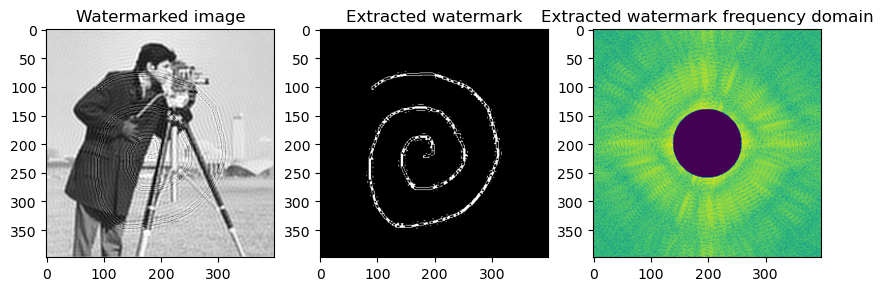

In [47]:
def remove_watermark_hard(watermarked_image: Union[np.ndarray, Any]) -> np.ndarray:
	'''
	Returns the extracted watermark from the watermarked image (and some extras to plot), using only the watermarked image
	'''
	# transform to frequency domain
	watermarked_fft = np.fft.fft2(watermarked_image)
	watermarked_fft_shift = np.fft.fftshift(watermarked_fft)

	# process of extracting the watermark in the frequency domain
	mask = np.ones(watermarked_fft_shift.shape)
	cv2.circle(mask, (image_fft_shift.shape[0]//2, image_fft_shift.shape[1]//2), 60, 0, -1)
	
	watermark_fft_shif = watermarked_fft_shift * mask

	# transform back to spatial domain
	extracted_watermark_fft = np.fft.ifftshift(watermark_fft_shif)
	extracted_watermark = np.fft.ifft2(extracted_watermark_fft).real

	# for consistency, clip values to [0, 255]
	extracted_watermark = np.clip(extracted_watermark, 0, 255).astype(np.uint8)

	# threshold to get binary image
	_, extracted_watermark = cv2.threshold(extracted_watermark, 30, 255, cv2.THRESH_BINARY)

	# apply closing to close holes
	structuring_element = np.ones((3, 3), np.uint8)
	extracted_watermark = closing(extracted_watermark, structuring_element)

	return extracted_watermark, watermark_fft_shif

extracted_watermark, watermark_fft_shif = remove_watermark_hard(watermarked)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(watermarked, cmap='gray')
plt.title('Watermarked image')
plt.subplot(1, 3, 2)
plt.imshow(extracted_watermark, cmap='gray', vmin=0, vmax=255)
plt.title('Extracted watermark')
plt.subplot(1, 3, 3)
plt.imshow(np.log1p(np.abs(watermark_fft_shif)))
plt.title('Extracted watermark frequency domain')
plt.show()

---

When text is passed, a binary mask is build with the text drawed on it, and the same operation is performed as if it was a watermark image.

---

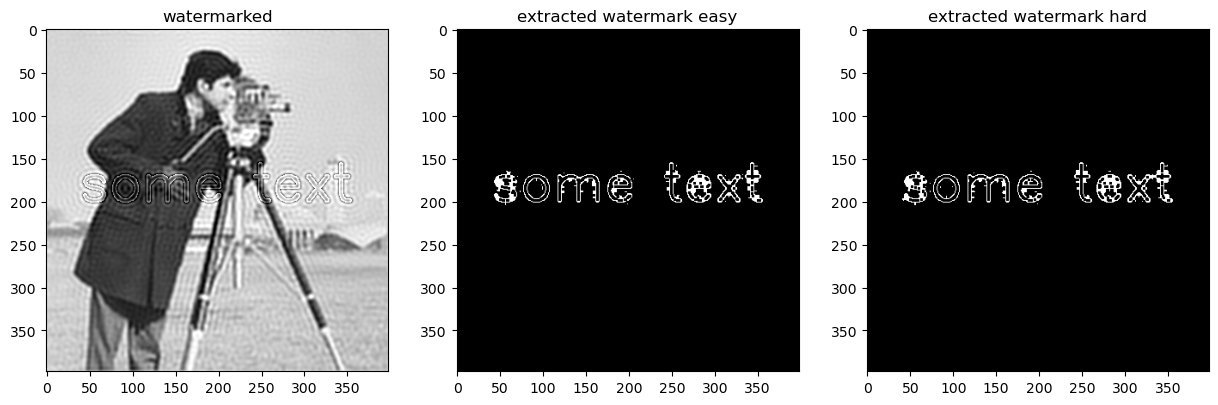

In [48]:
watermarked, _ = apply_watermark(image, None, 'some text')
watermark_extracted_1,_ = remove_watermark_easy(image, watermarked)
watermark_extracted_2,_ = remove_watermark_hard(watermarked)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(watermarked, cmap='gray')
plt.title('watermarked')
plt.subplot(1, 3, 2)
plt.imshow(watermark_extracted_1, cmap='gray')
plt.title('extracted watermark easy')
plt.subplot(1, 3, 3)
plt.imshow(watermark_extracted_2, cmap='gray')
plt.title('extracted watermark hard')
plt.show()

## Watermark extraction challenge


#### Objective:
Create a binary mask where you can read the text of the watermark hidden on images on folder ```lab2_challenge```.  
Remember that this challenge counts as extra part of the lab and do not count of the optional points of this lab, so there's no guideline. Instead there's a hint on each level you can use to start designing your own method.


---

#### Hints:
  - Hints for each image:
    - Easy: Will edges and some post-processing be enough?
    - Medium: Equalizing the image correclty could make watermark more visible
    - Hard: Do you think image looks wierd enough to check fourier spece?

---

#### Expected results:
- A binary image with the extracted text (or at least somewhat readable) and the string of text you extracted on each one.

---

For the easy and medium, we aimed to perform edge detection so that the text was more easily seen, and further with thresholding.

---

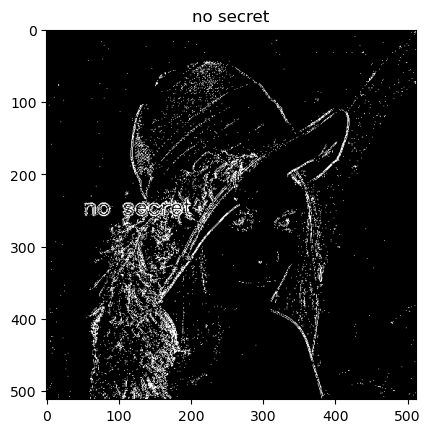

In [60]:
image_easy = cv2.imread('images/challenge/watermark_easy.png', cv2.IMREAD_GRAYSCALE)

# detect edges for better visualization
edges = cv2.Laplacian(image_easy, cv2.CV_64F) # we found Laplacian to be the one that performs best
edges = np.uint8(np.abs(edges))

# threshold to get binary image
_, thresh = cv2.threshold(edges, 40, 255, cv2.THRESH_BINARY) # threshold value was found by trial and error

# display result
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title('no secret')
plt.show()

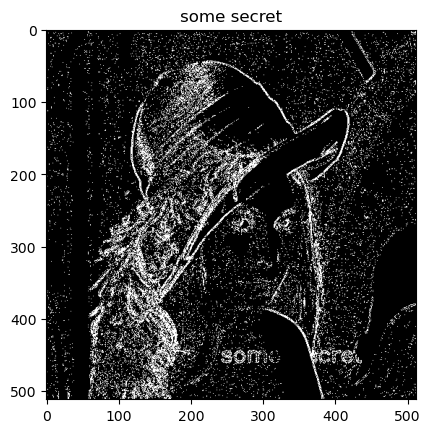

In [446]:
image_medium = cv2.imread('images/challenge/watermark_medium.png', cv2.IMREAD_GRAYSCALE)

# histogram equalization of the image
res = cv2.equalizeHist(image_medium)

# detect edges for better visualization
edges = cv2.Laplacian(res, cv2.CV_64F)
edges = np.uint8(np.abs(edges))

# threshold to get binary image
_, thresh = cv2.threshold(edges, 40, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title('some secret')
plt.show()

---

For the hard one, we visualized it in frequency domain, and realized there was a "donut"-like section that didn't belong there, so we applied a mask to extract it and transform it back to spatial domain, where a text was partially visible and readable. With thresholdig we enhanced it.

---

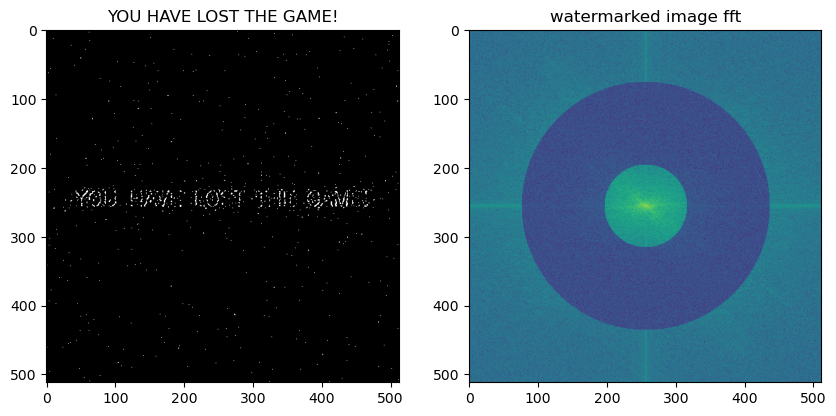

In [65]:
image_hard = cv2.imread('images/challenge/watermark_hard.png', cv2.IMREAD_GRAYSCALE)

# transform to frequency domain
fourier = np.fft.fft2(image_hard)
fourier_shift = np.fft.fftshift(fourier)

# create a "donut" mask
mask = np.zeros(fourier_shift.shape)
cv2.circle(mask, (fourier_shift.shape[0]//2, fourier_shift.shape[1]//2), 180, 1, -1)
cv2.circle(mask, (fourier_shift.shape[0]//2, fourier_shift.shape[1]//2), 60, 0, -1)

# extract the watermark using mask
watermark_shift = fourier_shift * mask

# transform back to spatial domain
res = np.fft.ifftshift(watermark_shift)
res = np.fft.ifft2(res).real

# threshold to get binary image
_, thresh = cv2.threshold(res, 0.5, 1, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('YOU HAVE LOST THE GAME!')
plt.subplot(1, 2, 2)
plt.imshow(np.log1p(np.abs(fourier_shift)))
plt.title('watermarked image fft')
plt.show()